In [1]:
import os
import sys
sys.path.append(os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/"))
from STable_tools import read_stable, split_tubeids, read_wcsim_geometry

import itertools
import uproot
import ROOT
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 4)

Welcome to JupyROOT 6.24/09


In [2]:
ROOT.gROOT.SetMacroPath("/pbs/home/g/gdiazlop/Software/fiTQun/fiTQun/")
ROOT.gROOT.LoadMacro("TScatTableF_cc.so")

0

In [3]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/old_tools/fiTQun_scattablesF.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/STable/scattables_1file.root")

In [4]:
otables = read_stable(ofname)
tables  = read_stable(fname)

In [5]:
otables.keys()

dict_keys(['botscattable_bins', 'botscattable', 'topscattable_bins', 'topscattable', 'sidescattable_bins', 'sidescattable'])

In [6]:
otab = otables["botscattable"]
tab  =  tables["botscattable"]

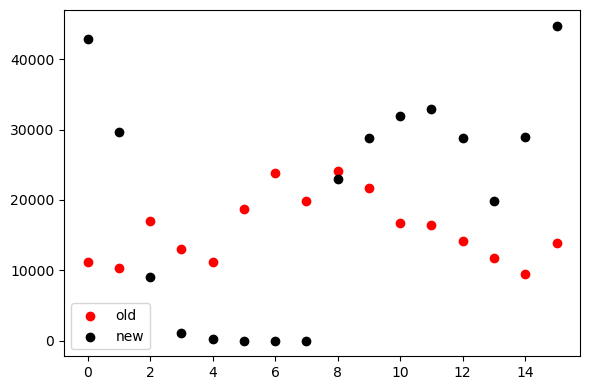

In [13]:
dims = list(range(6))
pax = 5

plt.figure()

# old
proj = otab.sum(axis=tuple(np.delete(dims, pax)))
plt.scatter(range(len(proj)), proj, color="red", label="old")

# new
proj = tab.sum(axis=tuple(np.delete(dims, pax)))
plt.scatter(range(len(proj)), proj, color="k", label="new")

plt.legend()
plt.tight_layout()

In [47]:
136.95*0.02

2.739

In [14]:
tubezpos  = 136.95
cylRadius = 172.05

In [15]:
ROOT.gSystem.AddDynamicPath(os.path.expandvars("$HOME/Software/WCSim/install/lib"))
ROOT.gSystem.Load          ("libWCSimRoot.dylib" if sys.platform == "darwin" else "libWCSimRoot.so")

filename = os.path.expandvars("$LUSTRE/STable/file/out_e-_1.root")
tubeid_bottom, tubeid_top, tubeid_side = split_tubeids(filename, vaxis=1)
df, pmts_df = read_wcsim_geometry(filename)

In [16]:
df

,WC
WCCylRadius,1646.639404
WCCylLength,3377.589417
Geo_Type,0.000000
WCNumPMT,2014.000000
WCPMTRadius,4.000000
WCOffset0,0.000000
WCOffset1,0.000000
WCOffset2,0.000000


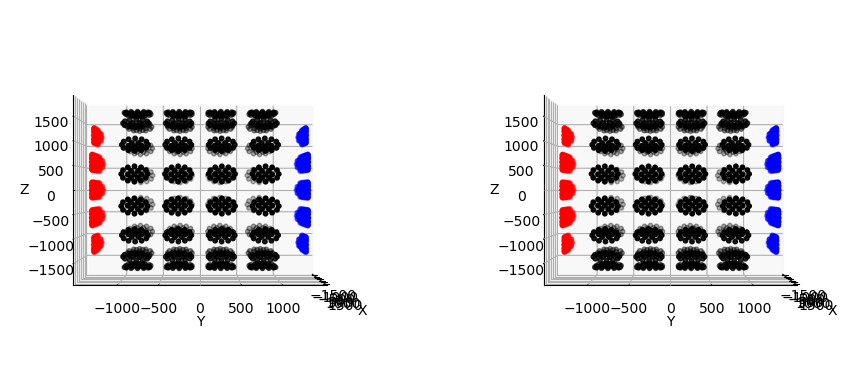

In [20]:
fig = plt.figure(figsize=[10, 4])

# my
ax = fig.add_subplot(121, projection='3d')

# bottom
sel = np.isin(pmts_df.TubeNo, tubeid_bottom)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="red", label="bottom")

# top
sel = np.isin(pmts_df.TubeNo, tubeid_top)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="blue", label="top")

# side
sel = np.isin(pmts_df.TubeNo, tubeid_side)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="black", label="side")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(0, 0)


ax = fig.add_subplot(122, projection='3d')

x = pmts_df.Position_x0
y = pmts_df.Position_x1
z = pmts_df.Position_x2

# side
sel = (-1100<y) & (y<1100)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="black", label="side")

# bottom
sel = (y<-1100)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="red", label="bottom")

# top
sel = (1100<y)
ax.scatter(pmts_df.loc[sel, "Position_x0"], pmts_df.loc[sel, "Position_x1"], pmts_df.loc[sel, "Position_x2"], s=10, color="blue", label="top")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(0, 0)

plt.tight_layout()